In [56]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io as sio
import shdom
import scipy.ndimage as sci


In [57]:
dynamic_medium, dynamic_rte_solver, dynamic_measurements = shdom.load_dynamic_forward_model('experiments/rico52x57x26_velocity_4_3_9img_perspective/dynamic_medium')
medium, rte_solver, measurements = shdom.load_forward_model('Develop_Dynamic_cloud/experiments/WIZ_dt10_truncated_velocity_0_0_9img_perspective/dynamic_medium')

In [58]:
def image_preprocessing(image,shift_vec):
    # out_image = np.roll(image,(-np.round(shift[0]).astype(int),-np.round(shift[1]).astype(int)))
    out_image = sci.shift(image,-shift_vec,mode='constant',cval=0)
    return out_image

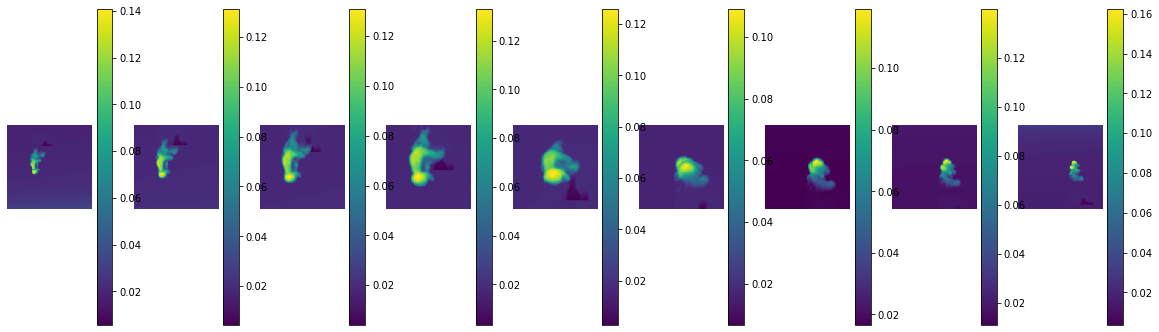

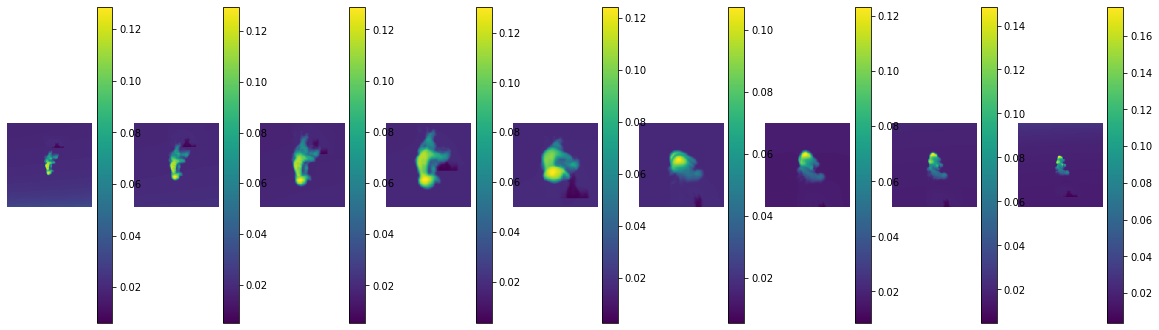

In [59]:
f, axarr = plt.subplots(1, len(dynamic_measurements.images), figsize=(20, 20))
for ax, image in zip(axarr, dynamic_measurements.images):
    pcm = ax.imshow(image) 
    ax.axis('off')
    f.colorbar(pcm,ax=ax)
f, axarr = plt.subplots(1, len(dynamic_measurements.images), figsize=(20, 20))
for ax, image in zip(axarr, measurements.images):
    pcm = ax.imshow(image) 
    ax.axis('off')
    f.colorbar(pcm,ax=ax)

In [60]:
images=[]
index = np.floor(dynamic_medium.num_mediums/2).astype(int)

velocity = dynamic_medium.dynamic_scatterer.get_velocity()

velocity=np.mean(velocity,0)
dx = dynamic_medium.dynamic_scatterer[index].get_scatterer().grid.dx
dy = dynamic_medium.dynamic_scatterer[index].get_scatterer().grid.dy
for time,image in zip(dynamic_medium.time_list,dynamic_measurements.images):
    shift = velocity[:-1] * time / [dx, dy]
    images.append(image_preprocessing(image,shift))

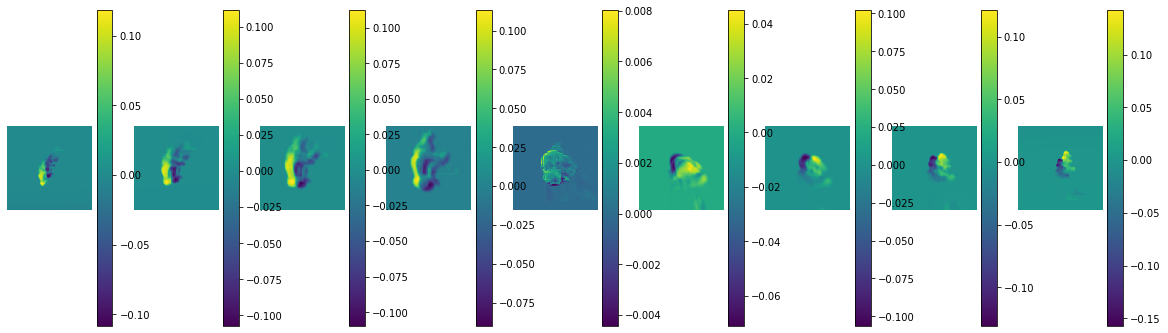

In [61]:
f, axarr = plt.subplots(1, len(measurements.images), figsize=(20, 20))
for ax, shifted_image, static_measured_image in zip(axarr,images, measurements.images):
    pcm = ax.imshow(shifted_image-static_measured_image)
    ax.axis('off')
    f.colorbar(pcm,ax=ax)

In [62]:
# medium = dynamic_medium[index]
print(np.linalg.norm(np.asarray(measurements.images) - np.asarray(images)))
# measurements.images = images
measurements = shdom.Measurements(measurements.camera,images,wavelength=measurements.wavelength)
print(np.linalg.norm(np.asarray(measurements.images) - np.asarray(images)))

9.013121
0.0


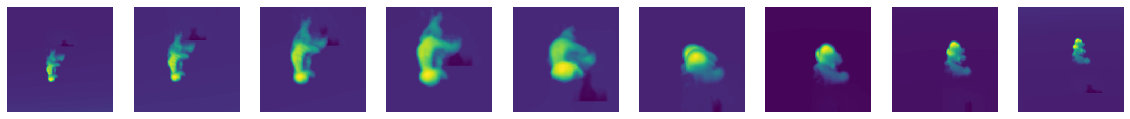

In [63]:
f, axarr = plt.subplots(1, len(measurements.images), figsize=(20, 20))
for ax, image in zip(axarr, measurements.images):
    ax.imshow(image)
    ax.axis('off')


In [64]:
numerical_params = shdom.NumericalParameters()
scene_params = shdom.SceneParameters(
    wavelength=dynamic_medium.wavelength,
    source=shdom.SolarSource(azimuth=65, zenith=135)
)

rte_solver = shdom.RteSolver(scene_params, numerical_params)
rte_solver.set_medium(medium)

In [65]:
output_dir = '../experiments/rico52x57x26_velocity_3_4_9img_perspective_gt_preprocessed/monochromatic'
shdom.save_forward_model(output_dir, medium, rte_solver, measurements)
